# SISTEMA DE RECOMENDACIÓN - PROYECTO 4

#### La finalidad de este proyecto final es mejorar el resultado obtenido en el proyecto anterior, basado en sistemas de recomendacion.

In [5]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [43]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 100
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

    

In [44]:
data_reviews_a = pd.DataFrame(data_reviews)

In [45]:
data_reviews_a.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,NaN,NaN
2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,NaN,NaN
3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,NaN,NaN
4,Nyc2x,4.3,471.0,35600,0,2014-12-24,A hybrid adventure/puzzle game that will reall...,False,3,NaN,NaN,NaN


In [46]:
data_reviews = data_reviews_a[(data_reviews_a.hours>0)]

data_reviews.describe()

,hours,products,page_order,page,found_funny
count,77601.000000,77431.000000,77601.000000,77601.000000,12009.000000
mean,113.458205,235.383051,4.421605,893.695532,8.452744
std,395.608073,471.476788,2.900505,1929.950730,84.140856
min,0.100000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,46.000000,2.000000,52.000000,1.000000
50%,15.400000,111.000000,4.000000,235.000000,1.000000
75%,59.600000,246.000000,7.000000,828.000000,3.000000
max,18543.300000,11222.000000,9.000000,18369.000000,4051.000000


In [47]:
ratings = []

Malo = 1 
Mediocre = 2
Bueno = 3
Muy_bueno = 4
Excelente = 5

for i in data_reviews['hours']:
    if i<=10:
        ratings.append(Malo)
    elif i>10 and i<=25:
        ratings.append(Mediocre)
    elif i>25 and i<=50:
        ratings.append(Bueno)
    elif i>50 and i<=100:
        ratings.append(Muy_bueno)
    else:
        ratings.append(Excelente)
    

In [48]:
data_reviews['ratings'] = ratings

C:\Users\patrimoore\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Games**

In [49]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [50]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


Hacemos un join entre los dos datasets para crear uno nuevo con los datos necesarios.

In [51]:
data_new_a = pd.merge(left=data_reviews,right=data_games, left_on='product_id', right_on='id')

data_new_a.head()

,username,hours,products,product_id,page_order,date,text,early_access_x,page,user_id,...,tags,discount_price,reviews_url,specs,price,early_access_y,id,developer,sentiment,metascore
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,...,"[Action, Adventure, Indie, Simulation]",NaN,http://steamcommunity.com/app/725280/reviews/?...,"[Single-player, Steam Trading Cards]",2.99,False,725280,Vyacheslav Shilikhin,Positive,NaN
1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,...,"[Casual, Puzzle]",NaN,http://steamcommunity.com/app/288690/reviews/?...,[Single-player],4.99,False,288690,Witan Entertainment,4 user reviews,NaN
2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,...,"[Casual, Strategy, Puzzle]",NaN,http://steamcommunity.com/app/384210/reviews/?...,"[Single-player, Full controller support, Steam...",7.99,False,384210,Gamesare,2 user reviews,NaN
3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,...,"[Free to Play, Action, Strategy, Massively Mul...",NaN,http://steamcommunity.com/app/399660/reviews/?...,"[Multi-player, MMO, Co-op, Steam Achievements,...",Free to Play,False,399660,Petroglyph,Mixed,NaN
4,Wraitheon,1.1,5.0,399660,3,2016-10-11,awesome game that blends moba and rts together...,False,2,76561198040024441,...,"[Free to Play, Action, Strategy, Massively Mul...",NaN,http://steamcommunity.com/app/399660/reviews/?...,"[Multi-player, MMO, Co-op, Steam Achievements,...",Free to Play,False,399660,Petroglyph,Mixed,NaN


In [52]:
#Eliminaremos columnas innecesarias, que no nos aportan mucha información

data_new_a.drop(columns=["title","url","release_date","discount_price","reviews_url","products","page_order","page","found_funny","compensation","developer","metascore"],inplace=True)
data_new_a.head(1)

,username,hours,product_id,date,text,early_access_x,user_id,ratings,publisher,genres,app_name,tags,specs,price,early_access_y,id,sentiment
0,Chaos Syren,0.1,725280,2017-12-17,This would not be acceptable as an entertainme...,False,NaN,1,Vyacheslav Shilikhin,"[Action, Adventure, Indie, Simulation]",Psi Project,"[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]",2.99,False,725280,Positive


Como habiamos planteado en el final del proyecto 3, utilizare NLP para poder recomendar juegos en base a los campos de tipo texto, tales como los generos del juego o los tags.

In [53]:
#Analizaremos y graficaremos la columna género

generos = data_new_a.genres.explode()
generos=generos.value_counts()
generos=generos.sort_values(ascending=False)
generos

Action                       47947
Indie                        37004
Adventure                    25952
RPG                          20411
Strategy                     14820
Free to Play                 13593
Simulation                   13158
Casual                        8824
Massively Multiplayer         8082
Early Access                  6484
Sports                        1943
Racing                        1512
Utilities                      260
Design &amp; Illustration      258
Animation &amp; Modeling       236
Video Production                98
Web Publishing                  59
Education                       29
Software Training               28
Audio Production                17
Photo Editing                   15
Name: genres, dtype: int64

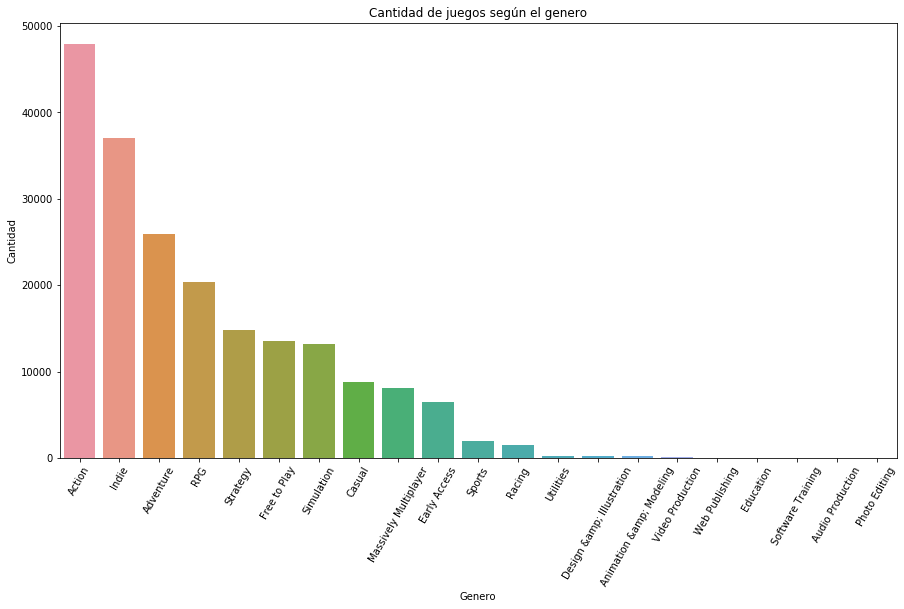

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plot = sns.barplot(x = generos.index, y= generos.values)


for item in plot.get_xticklabels():
    item.set_rotation(60)
    
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Cantidad de juegos según el genero")      
plt.show()

In [55]:
#Vamos a ver los distintos modos de juegos que existen en nuestro dataset

modo_juego=data_new_a.specs.explode()
modo_juego=modo_juego.value_counts()
modo_juego=modo_juego.sort_values(ascending=False)
modo_juego

Single-player                 63909
Steam Achievements            53897
Steam Trading Cards           46573
Multi-player                  35432
Steam Cloud                   34629
Full controller support       26944
Co-op                         18166
Partial Controller Support    18050
Steam Workshop                15069
Steam Leaderboards            11823
Includes level editor         11362
Cross-Platform Multiplayer    10747
Online Multi-Player           10636
In-App Purchases              10110
Stats                          9644
Valve Anti-Cheat enabled       9309
Captions available             7985
MMO                            6394
Online Co-op                   5753
Shared/Split Screen            5740
Commentary available           3255
Local Multi-Player             3029
Local Co-op                    2381
Includes Source SDK            1376
Mods                            105
Steam Turn Notifications         99
Mods (require HL2)               80
Downloadable Content        

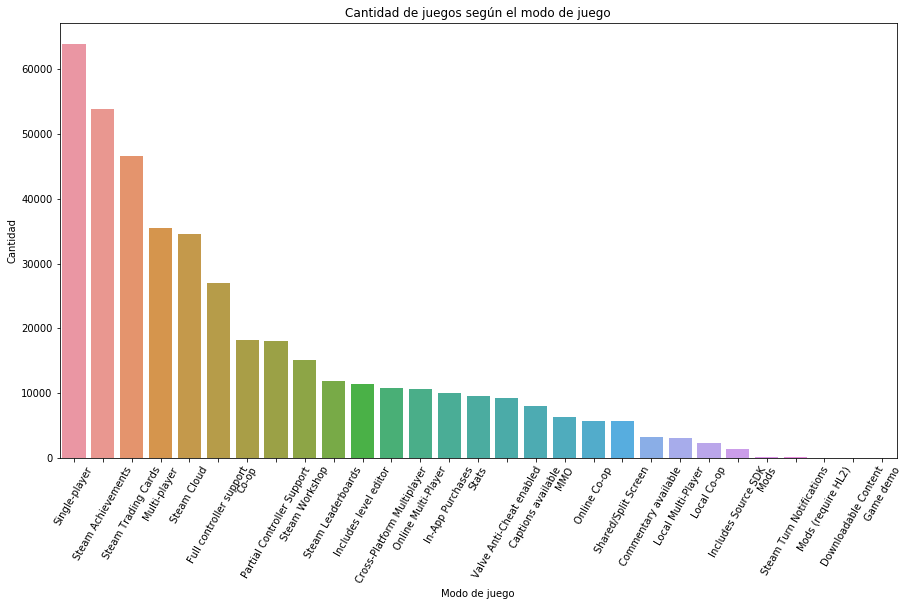

In [56]:
import seaborn as sns

plt.figure(figsize = (15,8))
plot = sns.barplot(x = modo_juego.index, y= modo_juego.values)

for item in plot.get_xticklabels():
    item.set_rotation(60)
    
plt.xlabel("Modo de juego")
plt.ylabel("Cantidad")
plt.title("Cantidad de juegos según el modo de juego")    
plt.show()

In [57]:
#Analizamos la columna precios
precio=data_new_a.price.unique()

import numpy as np
category_prices = lambda x: np.unique(np.array([i for i in list(x) if type(i) == str]))
category_prices(data_new_a.price)

def transform_prices(df):
    df['category_price'] = df.price.apply(
        lambda p: 'paid' if (type(p) == float or p.startswith('Starting')) else 'free')
    df.drop('price', axis=1, inplace=True)
    
transform_prices(data_new_a)
data_new_a.head(1)



,username,hours,product_id,date,text,early_access_x,user_id,ratings,publisher,genres,app_name,tags,specs,early_access_y,id,sentiment,category_price
0,Chaos Syren,0.1,725280,2017-12-17,This would not be acceptable as an entertainme...,False,NaN,1,Vyacheslav Shilikhin,"[Action, Adventure, Indie, Simulation]",Psi Project,"[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]",False,725280,Positive,paid


In [58]:
data_new_a.category_price.value_counts()

paid    63078
free    14588
Name: category_price, dtype: int64

In [59]:
top_pagos=data_new_a.loc[data_new_a.category_price=="paid"]
top_pagos=top_pagos.loc[:,["app_name","hours"]].groupby(data_new_a.app_name).sum()
top_pagos=top_pagos.sort_values(by="hours",ascending=False)
top_pagos=top_pagos[0:15]
top_pagos

,hours
app_name,
Rust,475256.9
Garry's Mod,269709.4
Arma 3,241781.3
ARK: Survival Evolved,219285.2
Counter-Strike: Source,176723.8
Fallout 4,167872.6
DayZ,148458.6
Mount & Blade: Warband,146795.9
Sid Meier's Civilization® V,142468.5


In [60]:
top_free=data_new_a.loc[data_new_a.category_price=="free"]
top_free=top_free.loc[:,["app_name","hours"]].groupby(data_new_a.app_name).sum()
top_free=top_free.sort_values(by="hours",ascending=False)
top_free=top_free[0:10]
top_free

,hours
app_name,
Team Fortress 2,1376971.1
Warframe,329969.5
Robocraft,85039.7
SMITE®,84338.1
Clicker Heroes,83759.7
APB Reloaded,60515.8
Heroes & Generals,54780.1
Realm of the Mad God,49016.9
Trove,46815.7


## NLP

Ahora que ya hicimos un analisis del dataset, vamos a aplicar NLP

In [61]:

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import itertools
import nltk
import re

stemmer = PorterStemmer()
stopwords = nltk.corpus.stopwords.words("english") 

In [62]:
texto_1 = []

for texto in data_new_a.text:
    
    texto=re.sub("[^a-zA-Z]"," ",str(texto))
    texto=texto.lower()
    texto=nltk.tokenize.word_tokenize(texto)
    texto=[palabra for palabra in texto if len(palabra)>3]
    texto=[s for s in texto if not s in stopwords]
    
    texto_1.append(texto)

In [63]:
texto_1 = list(itertools.chain(*texto_1))

In [64]:
freq_texto_1 = nltk.FreqDist(texto_1)
freq_texto_1

FreqDist({'game': 114042, 'like': 25012, 'good': 18847, 'play': 18419, 'really': 14664, 'great': 14317, 'games': 14017, 'time': 13837, 'would': 11707, 'story': 11378, ...})

In [65]:
df_texto_1= pd.DataFrame(list(freq_texto_1.items()), columns = ["Word","Frequency"])
df_texto_1.sort_values('Frequency',ascending=False, inplace = True)

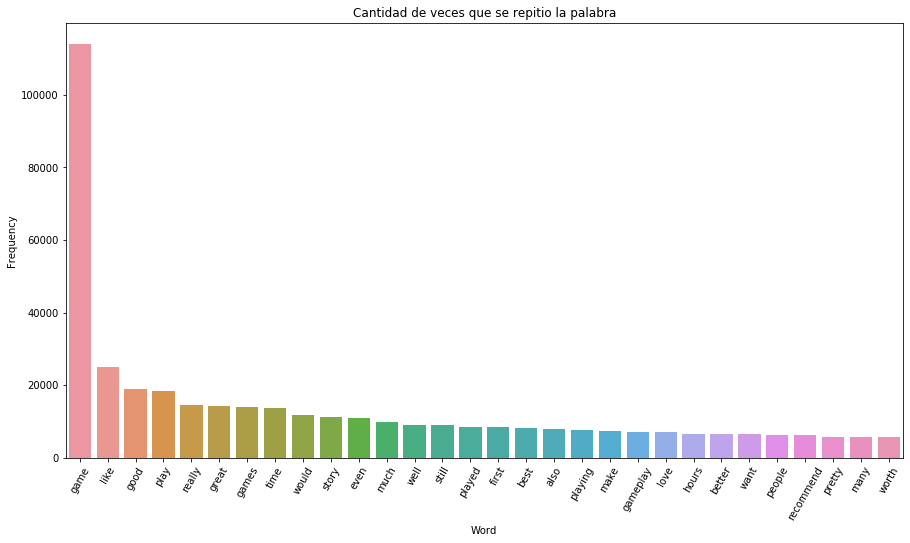

In [66]:
import seaborn as sns

plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_texto_1.iloc[:30].Word, y = df_texto_1.iloc[:30].Frequency)

for item in plot.get_xticklabels():
    item.set_rotation(60)

plt.title("Cantidad de veces que se repitio la palabra")    
plt.show()

Utilizaremos textblob para analizar los sentimientos de las palabras a traves de la polaridad. Podemos encontrar la documentacion de la libreria aqui: https://textblob.readthedocs.io/en/dev/

In [67]:
from textblob import TextBlob

analisis_sent=data_new_a.copy()

pol=lambda x: TextBlob(x).sentiment.polarity
sub=lambda x: TextBlob(x).sentiment.subjectivity

analisis_sent["polaridad"]=analisis_sent["text"].apply(pol)
analisis_sent["subjetividad"]=analisis_sent["text"].apply(sub)
analisis_sent.head(1)

,username,hours,product_id,date,text,early_access_x,user_id,ratings,publisher,genres,app_name,tags,specs,early_access_y,id,sentiment,category_price,polaridad,subjetividad
0,Chaos Syren,0.1,725280,2017-12-17,This would not be acceptable as an entertainme...,False,NaN,1,Vyacheslav Shilikhin,"[Action, Adventure, Indie, Simulation]",Psi Project,"[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]",False,725280,Positive,paid,0.0,0.0


In [68]:
analisis_sent[60:70]

,username,hours,product_id,date,text,early_access_x,user_id,ratings,publisher,genres,app_name,tags,specs,early_access_y,id,sentiment,category_price,polaridad,subjetividad
60,theedenstate,0.2,434620,2016-05-31,Yes. It's math.,False,76561198128469633,1,Vladimir Maslov,"[Casual, Indie]",Pythagoria,"[Indie, Casual, Puzzle, Education]","[Single-player, Steam Achievements, Steam Trad...",False,434620,Mostly Positive,paid,0.000000,0.000000
61,Ozzykun,1.8,745880,2017-11-29,"Have this beer on me ZUN, and bring more Touho...",False,NaN,1,"Mediascape Co., Ltd.",[Indie],東方天空璋 ～ Hidden Star in Four Seasons.,"[Bullet Hell, Great Soundtrack, Difficult, Fem...",[Single-player],False,745880,Overwhelmingly Positive,paid,0.500000,0.500000
62,Son_Typ,0.3,745880,2017-11-23,I can't understand a single word/10,False,NaN,1,"Mediascape Co., Ltd.",[Indie],東方天空璋 ～ Hidden Star in Four Seasons.,"[Bullet Hell, Great Soundtrack, Difficult, Fem...",[Single-player],False,745880,Overwhelmingly Positive,paid,-0.071429,0.214286
63,HnnghPffftHnngh,1.1,745880,2017-11-22,Best thing since sliced bread.,False,NaN,1,"Mediascape Co., Ltd.",[Indie],東方天空璋 ～ Hidden Star in Four Seasons.,"[Bullet Hell, Great Soundtrack, Difficult, Fem...",[Single-player],False,745880,Overwhelmingly Positive,paid,1.000000,0.300000
64,Placeable,0.7,745880,2017-11-19,"Game crashed after 20min, that's okay I love y...",False,NaN,1,"Mediascape Co., Ltd.",[Indie],東方天空璋 ～ Hidden Star in Four Seasons.,"[Bullet Hell, Great Soundtrack, Difficult, Fem...",[Single-player],False,745880,Overwhelmingly Positive,paid,0.200000,0.500000
65,terrortoad,3.5,745880,2017-11-18,Touhou on Steam? Shut up and take my money! Th...,False,NaN,1,"Mediascape Co., Ltd.",[Indie],東方天空璋 ～ Hidden Star in Four Seasons.,"[Bullet Hell, Great Soundtrack, Difficult, Fem...",[Single-player],False,745880,Overwhelmingly Positive,paid,0.214063,0.453125
66,gretino,1.6,745880,2017-11-17,我行我素，请,False,76561198143929596,1,"Mediascape Co., Ltd.",[Indie],東方天空璋 ～ Hidden Star in Four Seasons.,"[Bullet Hell, Great Soundtrack, Difficult, Fem...",[Single-player],False,745880,Overwhelmingly Positive,paid,0.000000,0.000000
67,Rebel Playz,62.3,271590,2018-01-04,GTA V is a great game but it is better on cons...,False,NaN,4,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,"[Open World, Action, Multiplayer, First-Person...","[Single-player, Multi-player, Steam Achievemen...",False,271590,Mixed,paid,0.055556,0.519444
68,SillyDilli,67.4,271590,2018-01-04,"ehhhhh, the game is really good but the server...",False,NaN,4,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,"[Open World, Action, Multiplayer, First-Person...","[Single-player, Multi-player, Steam Achievemen...",False,271590,Mixed,paid,0.450000,0.547222
69,: - ),33.2,271590,2018-01-04,send help,False,NaN,3,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,"[Open World, Action, Multiplayer, First-Person...","[Single-player, Multi-player, Steam Achievemen...",False,271590,Mixed,paid,0.000000,0.000000


Como la polaridad de estos registros no es muy buena, entiendo que recomendar juegos mediante el texto procesado no va a mejorar mi proyecto anterior.

Investigue diversas librerias para poder utilizarlas y mejorar el proyecto 3 hasta que encontre LightFM, una libreria hibrida la cual combina sistemas de recomendacion por filtro colaborativo y basados en contenido. 
La documentacion se encuentra aqui: https://making.lyst.com/lightfm/docs/home.html

### LightFM


In [69]:
from lightfm import LightFM
from scipy.sparse import csr_matrix 
from scipy.sparse import coo_matrix 
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from lightfm.evaluation import recall_at_k

data_light=data_new_a.copy()
data_light['user_code'] = data_light.username.astype('category').cat.codes
data_light['nombre_app'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in data_light['app_name']])
data_light.head(1)


,username,hours,product_id,date,text,early_access_x,user_id,ratings,publisher,genres,app_name,tags,specs,early_access_y,id,sentiment,category_price,user_code,nombre_app
0,Chaos Syren,0.1,725280,2017-12-17,This would not be acceptable as an entertainme...,False,NaN,1,Vyacheslav Shilikhin,"[Action, Adventure, Indie, Simulation]",Psi Project,"[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]",False,725280,Positive,paid,8318,Psi Project


In [70]:

data_light["tags_genres"] = data_light["genres"] + data_light["tags"]

for i in data_light.index:
    if type(data_light.genres[i]) != float:
        data_light.tags_genres[i] = list(set(data_light.tags_genres[i]))
    else:
        data_light.tags_genres[i] = data_light.tags[i]
data_light.head(1)




C:\Users\patrimoore\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\patrimoore\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,username,hours,product_id,date,text,early_access_x,user_id,ratings,publisher,genres,app_name,tags,specs,early_access_y,id,sentiment,category_price,user_code,nombre_app,tags_genres
0,Chaos Syren,0.1,725280,2017-12-17,This would not be acceptable as an entertainme...,False,NaN,1,Vyacheslav Shilikhin,"[Action, Adventure, Indie, Simulation]",Psi Project,"[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]",False,725280,Positive,paid,8318,Psi Project,"[Simulation, Action, Indie, Adventure]"


In [71]:
#Nos quedamos con los campos que nos interesan

data_light=data_light[["hours","product_id","user_code","app_name","tags_genres","username"]]
data_light.head(1)

#Rellenaremos con 1 las interacciones entre usuarios e items y luego rellenaremos las celdas vacías

data_light["plays"] = 1

In [72]:
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

interacciones_matriz = pd.pivot_table(data_light, index='user_code', columns='app_name', values='plays')
interacciones_matriz = interacciones_matriz.fillna(0)

#La transformamos en una matriz COO
interacciones_matriz_coo = coo_matrix(interacciones_matriz.values)
interacciones_matriz_coo

<71329x6601 sparse matrix of type '<class 'numpy.float64'>'
	with 77496 stored elements in COOrdinate format>

In [75]:
#Separaremos en train y test 

from sklearn.model_selection import train_test_split

train, test = random_train_test_split(interacciones_matriz_coo, test_percentage = 0.25, random_state=42)

In [77]:
#Instanciaremos el modelo y entrenaremos

model = LightFM(loss = "warp", random_state = 42)

model.fit(interactions = train)

print("Test auc: %.2f" % auc_score(model, test, train).mean())

Test auc: 0.85


In [78]:
#Defimos una función para obtener recomendaciones

def sample_recommendation(model, train_data, matriz, user_id, item_features = None):
    
    recomendaciones = {}

    n_users, n_items = matriz.shape
    
    known_positives = matriz.columns[train_data.tocsr()[user_id].indices]

    scores = model.predict(user_id, np.arange(n_items), item_features = item_features)
    top_items = matriz.columns[np.argsort(-scores)]
    top_items = list(top_items)
   
    for x in known_positives:
        if x in top_items:
            top_items.remove(x)
            
    recomendaciones[matriz.index[user_id]] = top_items[:10]

    return recomendaciones

In [84]:
#Probamos nuestro sistema con un usuario y veremos las recomendaciones

recomendacion_model = sample_recommendation(model, train, interacciones_matriz, 41235)
recomendacion_model

{41235: ['Team Fortress 2',
  'Rust',
  'Borderlands 2',
  'Fallout 4',
  'Robocraft',
  'Life is Strange - Episode 1',
  'DayZ',
  'Grand Theft Auto V',
  'Warframe',
  'Portal 2']}

## Conclusiones

Al final del proyecto 3, me propuse utilizar NLP para poder obtener un sistema de recomendaciones basados en el texto del dataset. Sin embargo, una vez terminado el modelo, me encontré que este no era eficiente y por lo tanto no estaba mejorando el modelo creado en el proyecto anterior.

Por esto mismo, decidí seguir investigando acerca de librerías relacionadas a sistemas de recomendación y encontré LightFM, una librería hibrida que combina sistemas basados en contenido y con filtro colaborativo.

Una vez creado el modelo, el AUC obtenido fue de 0.85, siendo 1 el máximo. Este AUC es bastante aceptable y estoy conforme con el rendimiento de mi modelo. En el proyecto 3 obtuve un RMSE de 1.17, por lo tanto, entiendo que logre mi objetivo de mejorar el proyecto anterior.
